In [156]:
#Importing the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [157]:
#Importing the train dataset into a pandas dataframe
df_train = pd.read_csv(r'C:\Users\skkav\Documents\Data Analytics\Python\Loan Approval Prediction\train.csv')

#Printing the first 5 rows of the train dataset
df_train.head(5)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [158]:
#Understanding the distribution of values in each numerical columns
df_train.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [159]:
#Understanding the size of the dataset
df_train.size

762385

In [160]:
#Understanding the data type of each column
df_train.info()

#We can observe that we have 4 columns with object datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [161]:
#Finding the distinct values in the columns of object datatype
df_train['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [162]:
df_train['loan_intent'].unique()

array(['EDUCATION', 'MEDICAL', 'PERSONAL', 'VENTURE', 'DEBTCONSOLIDATION',
       'HOMEIMPROVEMENT'], dtype=object)

In [163]:
df_train['loan_grade'].unique()

array(['B', 'C', 'A', 'D', 'E', 'F', 'G'], dtype=object)

In [164]:
df_train['cb_person_default_on_file'].unique()

array(['N', 'Y'], dtype=object)

In [165]:
#Finding null values and fixing them
df_train.isnull().sum() #There are no null values in the dataset

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In case there were null values, the following methods can be followed to fill the null values in each of the column.
1. person_age, person_income, person_emp_length, loan_amnt, loan_int_rate, loan_percent_income, cb_person_cred_hist_length: mean
2. person_home_ownership, loan_intent, loan_grade, cb_person_default_on_file: mode

In [166]:
#Finding duplicate values and fixing them
df_train.duplicated().drop_duplicates()

0    False
dtype: bool

In [167]:
#Data Cleaning of each of the column values
df_train['person_home_ownership'] = df_train['person_home_ownership'].replace({'RENT': 'Rent', 'OWN':'Own', 'MORTGAGE':'Mortgage', 'OTHER':'Other'})
df_train['loan_intent'] = df_train['loan_intent'].replace({'EDUCATION':'Education', 'MEDICAL':'Medical', 'PERSONAL':'Personal', 'VENTURE':'Venture', 'DEBTCONSOLIDATION':'Debt Consolidation', 'HOMEIMPROVEMENT': 'Home Improvement'})
df_train.head(5)


,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,Rent,0.0,Education,B,6000,11.49,0.17,N,14,0
1,1,22,56000,Own,6.0,Medical,C,4000,13.35,0.07,N,2,0
2,2,29,28800,Own,8.0,Personal,A,6000,8.90,0.21,N,10,0
3,3,30,70000,Rent,14.0,Venture,B,12000,11.11,0.17,N,5,0
4,4,22,60000,Rent,2.0,Medical,A,6000,6.92,0.10,N,3,0


In [168]:
df_train.head(5)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,Rent,0.0,Education,B,6000,11.49,0.17,N,14,0
1,1,22,56000,Own,6.0,Medical,C,4000,13.35,0.07,N,2,0
2,2,29,28800,Own,8.0,Personal,A,6000,8.90,0.21,N,10,0
3,3,30,70000,Rent,14.0,Venture,B,12000,11.11,0.17,N,5,0
4,4,22,60000,Rent,2.0,Medical,A,6000,6.92,0.10,N,3,0


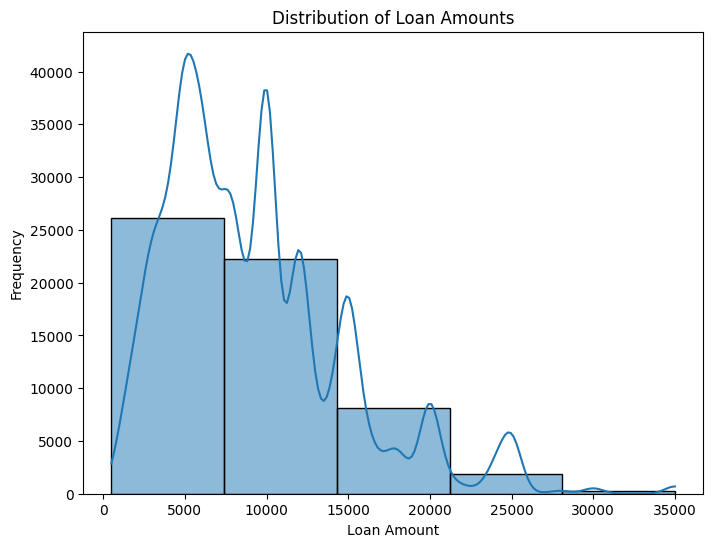

In [169]:
#Visualizing the distribution of loan amounts
plt.figure(figsize=(8, 6))
sns.histplot(df_train['loan_amnt'], bins=5, kde=True) #KDE - Kernet Density Estimate overlays the histogram with a smooth curve that represents the distribution of data
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

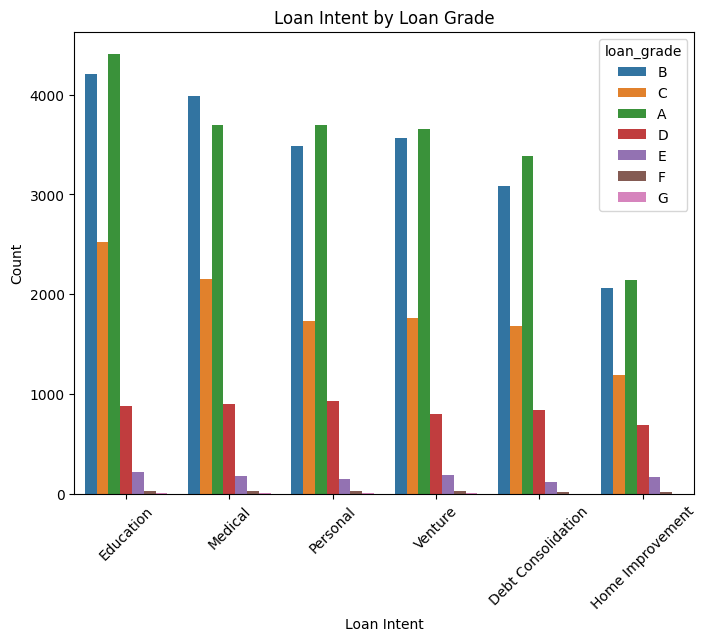

In [170]:
#Visualizing loan intent by grade
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x='loan_intent', hue='loan_grade')
plt.title('Loan Intent by Loan Grade')
plt.xlabel('Loan Intent')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

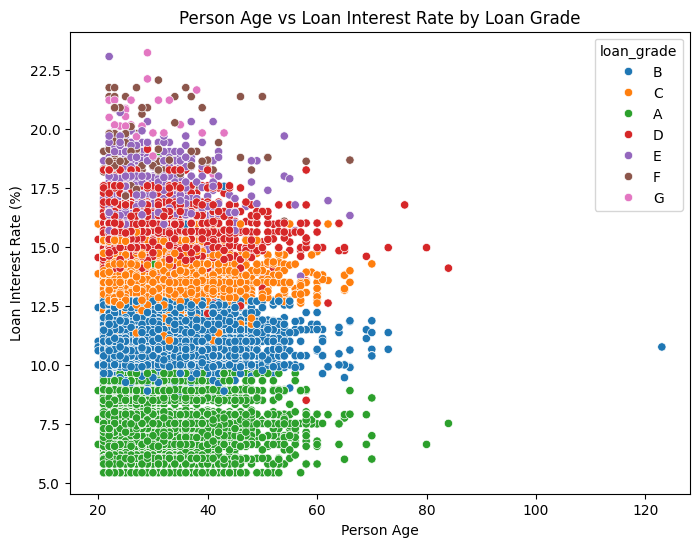

In [171]:
#Visualizing the relationship between Age and Loan Interest Rate
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_train, x='person_age', y='loan_int_rate', hue='loan_grade')
plt.title('Person Age vs Loan Interest Rate by Loan Grade')
plt.xlabel('Person Age')
plt.ylabel('Loan Interest Rate (%)')
plt.show()

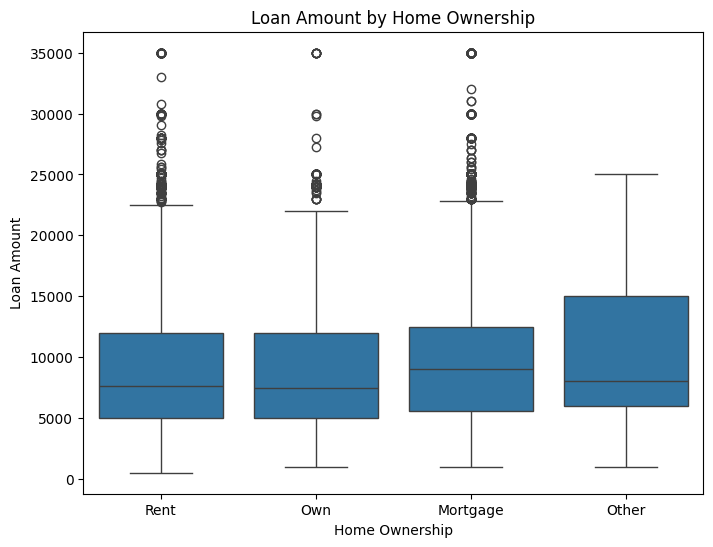

In [172]:
#Visualizing Home Ownership vs Loan Amount
plt.figure(figsize=(8, 6))
sns.boxplot(data = df_train, x = 'person_home_ownership', y = 'loan_amnt')
plt.title('Loan Amount by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Loan Amount')
plt.show()

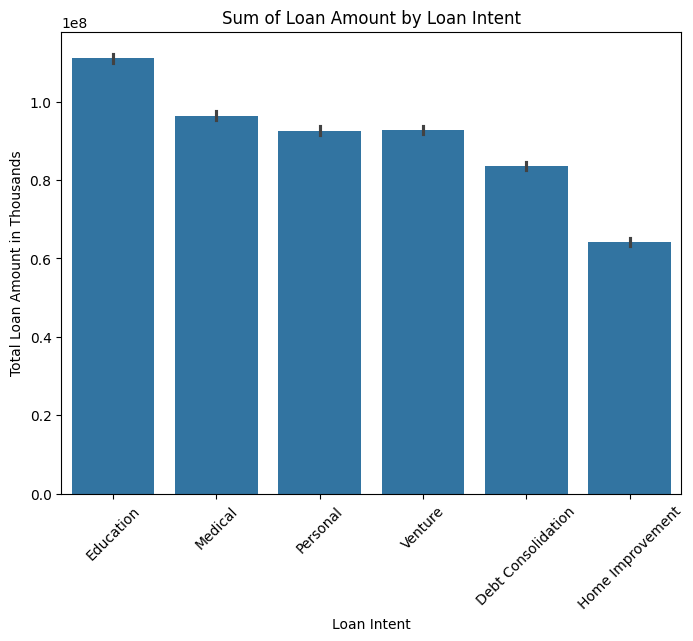

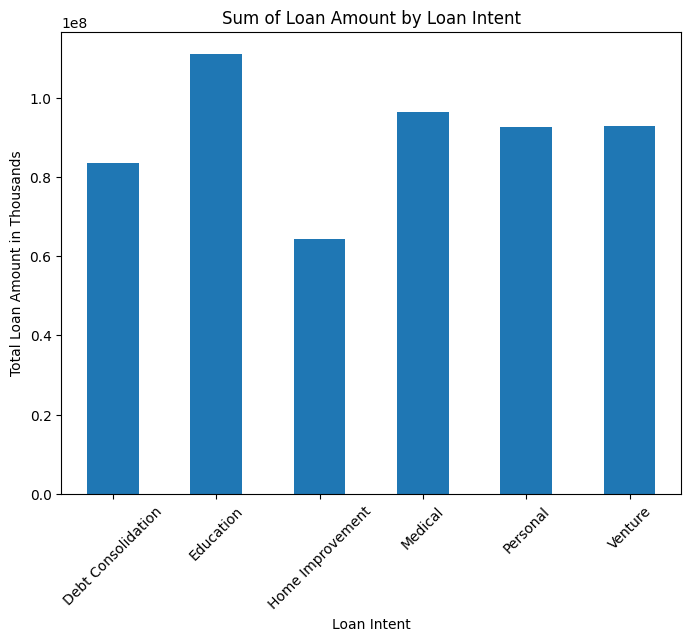

In [173]:
#Visualizing total loan amount by loan intent
plt.figure(figsize=(8, 6))
sns.barplot(data = df_train, x = 'loan_intent', y = 'loan_amnt', estimator=sum)
plt.title('Sum of Loan Amount by Loan Intent')
plt.xlabel('Loan Intent')
plt.xticks(rotation = 45)
plt.ylabel('Total Loan Amount in Thousands')
plt.show()

#Using matplot
loan_intent_sum = df_train.groupby('loan_intent')['loan_amnt'].sum()

plt.figure(figsize=(8, 6))
loan_intent_sum.plot(kind='bar')
plt.title('Sum of Loan Amount by Loan Intent')
plt.xlabel('Loan Intent')
plt.xticks(rotation = 45)
plt.ylabel('Total Loan Amount in Thousands')
plt.show()

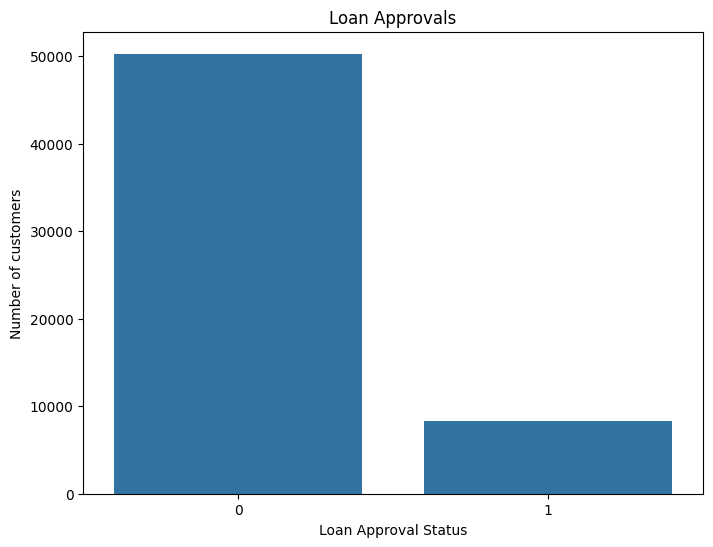

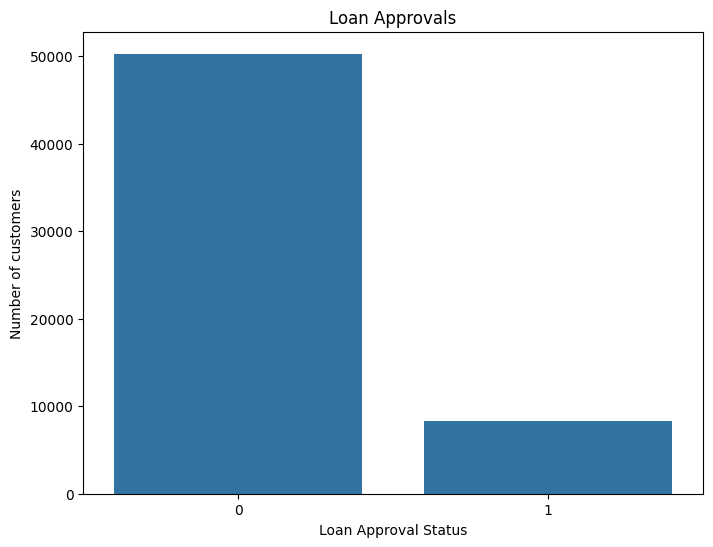

In [174]:
#Visualizing number of loan approvals
plt.figure(figsize=(8, 6))
sns.barplot(data=df_train, x = 'loan_status', y='id', estimator= lambda x: len(x))
plt.title('Loan Approvals')
plt.xlabel('Loan Approval Status')
plt.ylabel('Number of customers')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x = 'loan_status')
plt.title('Loan Approvals')
plt.xlabel('Loan Approval Status')
plt.ylabel('Number of customers')
plt.show()

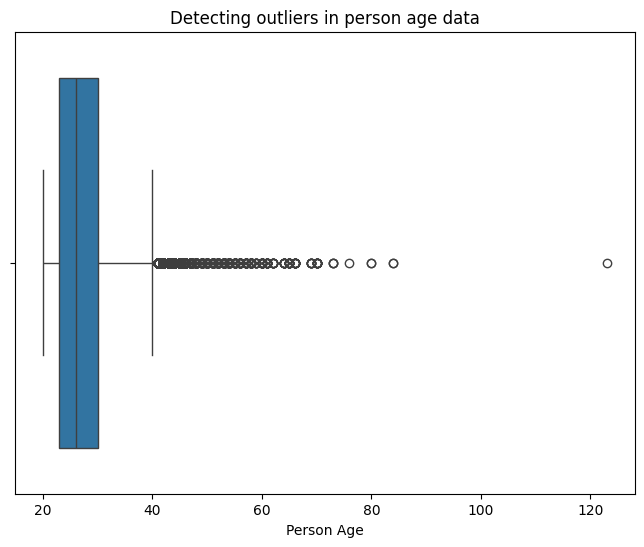

In [175]:
#Finding outliers in the person age column using box plot and fixing them
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_train['person_age'])
plt.title('Detecting outliers in person age data')
plt.xlabel('Person Age')
plt.show()

#We can notice that there is a person with age 123

In [176]:
#Determining the number of rows containing outliers
#Computing the 25th percentile value in person age
percentile25 = df_train['person_age'].quantile(0.25)

#Computing the 75th percentile value in person age
percentile75 = df_train['person_age'].quantile(0.75)

#Computing the interquartile range in tenure
iqr = percentile75 - percentile25

#Defining the upper limit and lower limit values for non-outlier value
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr
print("Lower limit: ", lower_limit)
print("Upper limit: ", upper_limit)

#Identifying the subset of the data that contains outliers in person age column
outliers = df_train[(df_train['person_age'] > upper_limit) |
                    (df_train['person_age'] < lower_limit)]

#Counting the number of rows that contain outliers in person age
print("Number of rows in the dataset containing outliers in 'person age' column: ", len(outliers))

#We have 2446 rows that contain outliers data. However, considering the context, it is not practical to eliminate the outlier data
#Hence, we will remove the 123 age value only

Lower limit:  12.5
Upper limit:  40.5
Number of rows in the dataset containing outliers in 'person age' column:  2446


In [177]:
#Updating the dataframe excluding the row that has person age as 123
df_train = df_train[df_train['person_age'] != '123']

In [178]:
#Checking if the updated dataframe has outlier data
df_train[df_train['person_age'] == '123']

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status


In [179]:
#Saving the cleaned dataset for future purposes
df_train.to_csv('loan_cleaned_dataset.csv')

In [180]:
df_train.head(5)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,Rent,0.0,Education,B,6000,11.49,0.17,N,14,0
1,1,22,56000,Own,6.0,Medical,C,4000,13.35,0.07,N,2,0
2,2,29,28800,Own,8.0,Personal,A,6000,8.90,0.21,N,10,0
3,3,30,70000,Rent,14.0,Venture,B,12000,11.11,0.17,N,5,0
4,4,22,60000,Rent,2.0,Medical,A,6000,6.92,0.10,N,3,0


In [181]:
#Label encoding all categorical variables
#Importing the necessary library and package
from sklearn.preprocessing import LabelEncoder

#List of categorical columns to encode
categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

#Initialize the LabelEncoder
label_encoder = LabelEncoder()

#Apply LabelEncoder to each categorical column
for columns in categorical_columns:
    df_train[columns] = label_encoder.fit_transform(df_train[columns])

print(df_train.head())

   id  person_age  person_income  person_home_ownership  person_emp_length  \
0   0          37          35000                      3                0.0   
1   1          22          56000                      2                6.0   
2   2          29          28800                      2                8.0   
3   3          30          70000                      3               14.0   
4   4          22          60000                      3                2.0   

   loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0            1           1       6000          11.49                 0.17   
1            3           2       4000          13.35                 0.07   
2            4           0       6000           8.90                 0.21   
3            5           1      12000          11.11                 0.17   
4            3           0       6000           6.92                 0.10   

   cb_person_default_on_file  cb_person_cred_hist_length  loan_statu

Using Chi-Square Test to determine whether there is a significant association between two categorical variables. 

In [182]:
#Importing the necessary library and package
from scipy.stats import chi2_contingency

#Categorical columns is already defined previously
significant_features = []

for column in categorical_columns:
    #Create a contingency table (cross-tabulation of two categorical variables)
    contingency_table = pd.crosstab(df_train[column], df_train['loan_status'])

    #Perform Chi-Square test
    chi2_stat, p, dof, expected = chi2_contingency(contingency_table) #dof - degree of freedom = (r-1)*(c-1), #expected - expected frequency = ((row total)*(column total))/(overall total)

    #Print results
    print(f"Chi-Square Statistic: {chi2_stat}")
    print(f"P-Value: {p}")

    #Interpret the p-value
    if p < 0.05:
        print("There is a significant relationship between person_home_ownership and loan_status")
    else:
        print("There is no significant relationship between person_home_ownership and loan_status")

Chi-Square Statistic: 3425.0639323497667
P-Value: 0.0
There is a significant relationship between person_home_ownership and loan_status
Chi-Square Statistic: 660.2262565994615
P-Value: 1.9499337690925457e-140
There is a significant relationship between person_home_ownership and loan_status
Chi-Square Statistic: 12476.2504454974
P-Value: 0.0
There is a significant relationship between person_home_ownership and loan_status
Chi-Square Statistic: 2048.4121413707107
P-Value: 0.0
There is a significant relationship between person_home_ownership and loan_status


In [183]:
#Building a Decision Tree model
#Importing the necessary library and package
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df_train.drop(columns=['loan_status']) #Excluding the target variable
y = df_train['loan_status'] #Defining the target variable

#Splitting the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

#Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state = 42)
dt_model.fit(X_train, y_train)

#Make prediction on the validation set
y_val_pred_dt = dt_model.predict(X_val)

#Calculate accuracy
accuracy_dt = accuracy_score(y_val, y_val_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt: .2f}")

#Confusion matrix
conf_matrix_dt = confusion_matrix(y_val, y_val_pred_dt)
print("Confusion Matrix (Decision Tree): ")
print(conf_matrix_dt)

#Classification report (precision, recall, F1-score)
print("Classification Report (Decision Tree): ")
print(classification_report(y_val, y_val_pred_dt))

Decision Tree Accuracy:  0.91
Confusion Matrix (Decision Tree): 
[[14316   810]
 [  694  1774]]
Classification Report (Decision Tree): 
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     15126
           1       0.69      0.72      0.70      2468

    accuracy                           0.91     17594
   macro avg       0.82      0.83      0.83     17594
weighted avg       0.92      0.91      0.92     17594



In [184]:
#Making prediction on the test dataset
#Loading the test dataset
df_test = pd.read_csv(r'C:\Users\skkav\Documents\Data Analytics\Python\Loan Approval Prediction\test.csv')
df_test.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [185]:
#Applying all data cleaning steps used in the train dataset on test dataset
#Data Cleaning of each of the column values
df_test['person_home_ownership'] = df_test['person_home_ownership'].replace({'RENT': 'Rent', 'OWN':'Own', 'MORTGAGE':'Mortgage', 'OTHER':'Other'})
df_test['loan_intent'] = df_test['loan_intent'].replace({'EDUCATION':'Education', 'MEDICAL':'Medical', 'PERSONAL':'Personal', 'VENTURE':'Venture', 'DEBTCONSOLIDATION':'Debt Consolidation', 'HOMEIMPROVEMENT': 'Home Improvement'})
df_test.head(5)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,Rent,3.0,Home Improvement,F,25000,15.76,0.36,N,2
1,58646,26,96000,Mortgage,6.0,Personal,C,10000,12.68,0.10,Y,4
2,58647,26,30000,Rent,5.0,Venture,E,4000,17.19,0.13,Y,2
3,58648,33,50000,Rent,4.0,Debt Consolidation,A,7000,8.90,0.14,N,7
4,58649,26,102000,Mortgage,8.0,Home Improvement,D,15000,16.32,0.15,Y,4


In [186]:
#Label encoding all categorical variables
#Importing the necessary library and package
from sklearn.preprocessing import LabelEncoder

#List of categorical columns to encode
categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

#Initialize the LabelEncoder
label_encoder = LabelEncoder()

#Apply LabelEncoder to each categorical column
for columns in categorical_columns:
    df_test[columns] = label_encoder.fit_transform(df_test[columns])

print(df_test.head())

      id  person_age  person_income  person_home_ownership  person_emp_length  \
0  58645          23          69000                      3                3.0   
1  58646          26          96000                      0                6.0   
2  58647          26          30000                      3                5.0   
3  58648          33          50000                      3                4.0   
4  58649          26         102000                      0                8.0   

   loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0            2           5      25000          15.76                 0.36   
1            4           2      10000          12.68                 0.10   
2            5           4       4000          17.19                 0.13   
3            0           0       7000           8.90                 0.14   
4            2           3      15000          16.32                 0.15   

   cb_person_default_on_file  cb_person_cred_hist_

In [187]:
#Loading the sample submission file
sample_submission_data = pd.read_csv(r'C:\Users\skkav\Documents\Data Analytics\Python\Loan Approval Prediction\sample_submission.csv')

In [188]:
#Prediction of Decision Tree on the test dataset
X_test = df_test
y_pred_test = dt_model.predict(X_test)
sample_submission_data['loan_status'] = y_pred_test
sample_submission_data[['id', 'loan_status']].to_csv('DT_submission.csv', index=False)

In [189]:
#Building XGBoost model
#Importing necessary libraries and packages
import xgboost as xgb

#Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators = 100, max_depth = 6, learning_rate = 0.3, random_state=42, eval_metric = 'logloss')
xgb_model.fit(X_train, y_train)

#Making predictions on the validation set
y_val_pred_xgb = xgb_model.predict(X_val)

#Calculate accuracy
accuracy_xgb = accuracy_score(y_val, y_val_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb: .2f}")

#Confusion matrix
conf_matrix_xgb = confusion_matrix(y_val, y_val_pred_xgb)
print("Confusion Matrix (XGBoost): ")
print(conf_matrix_xgb)

#Classification report (precision, recall, F1-score)
print("Classification Report (XGBoost): ")
print(classification_report(y_val, y_val_pred_xgb))

XGBoost Accuracy:  0.95
Confusion Matrix (XGBoost): 
[[14935   191]
 [  648  1820]]
Classification Report (XGBoost): 
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     15126
           1       0.91      0.74      0.81      2468

    accuracy                           0.95     17594
   macro avg       0.93      0.86      0.89     17594
weighted avg       0.95      0.95      0.95     17594



In [190]:
#Prediction of XGBoost on the test dataset
X_test = df_test
y_pred_test = xgb_model.predict(X_test)
sample_submission_data['loan_status'] = y_pred_test
sample_submission_data[['id', 'loan_status']].to_csv('XGB_submission.csv', index=False)